# Periodicity and AUTOCORRELATION 
What is autocorrelation?
> Autocorrelation is a type of serial dependence. 
Specifically, autocorrelation is when a time series is linearly related to a lagged version of itself. By contrast, correlation is simply when two independent variables are linearly related.

Here we are going to deal with iris dataset loaded from scikit-learn and then will see time series and autocorrelation.

In [44]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() 

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['target'])
df_iris.head() #to 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now to see the coorelation between sepal length and its width we will now create a scatter graph using pandas or seaborn.

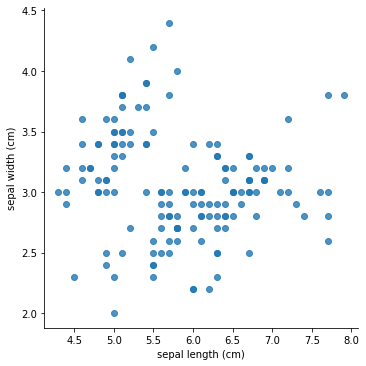

In [10]:
import seaborn as sns
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=df_iris);
#here we are disabling the regression part by putiing fit_reg=False.

Now we will analyse whether it is positve or negative correlation. Positive means both are directly proportional to each other, nd negative means both are inversely proportional.
Lets now build a scatter plot of 'sepal length' against 'sepal width'that is coloured by the target (species):


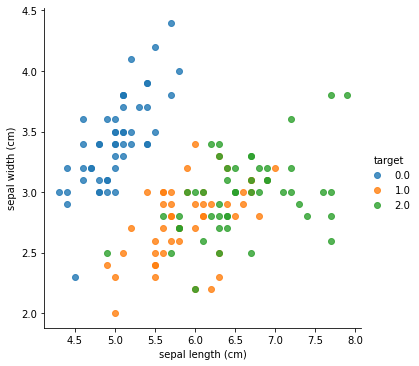

In [13]:
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)', fit_reg=False,data=df_iris,hue= 'target')


In the above plot it seems like a positive correlation. Visualisation is great to get an intution but for detailed analysis lets compute the correlation coefficient.


In [14]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


'sepal length (cm)' and 'sepal width (cm)' seem to be negatively correlated. And they are, over the entire population of flowers measured. We see that the correlation coefficent is -0.1. However, they are not negatively correlated within each species, as the coefficient is 0.78.
This method is known as Simpson Paradox. (Not discussing this in details.)
Lets compute the correlation coefficients of each pair of measurements within each species. The way to do this is by chaining the .groupby() and .corr() methods, to group by the target and print the correlation coefficient.

In [15]:
df_iris.groupby(['target']).corr()

sepal length (cm)  sepal width (cm)  \
target                                                          
0.0    sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1.0    sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2.0    sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0.0    sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1.0    sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2.0    sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

In [ ]:
In the above correlation matrix we can see that:
    - For target 0, the sepal length and width have a correlation of 0.75.
    - For target 1, we have a coefficient of 0.5.
    - For target 2, you get a correlation of 0.46.
    
    #Now we have taken a closer look at correlation,lets analyze our periodicity in the times series by looking at its autocorrelation function.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


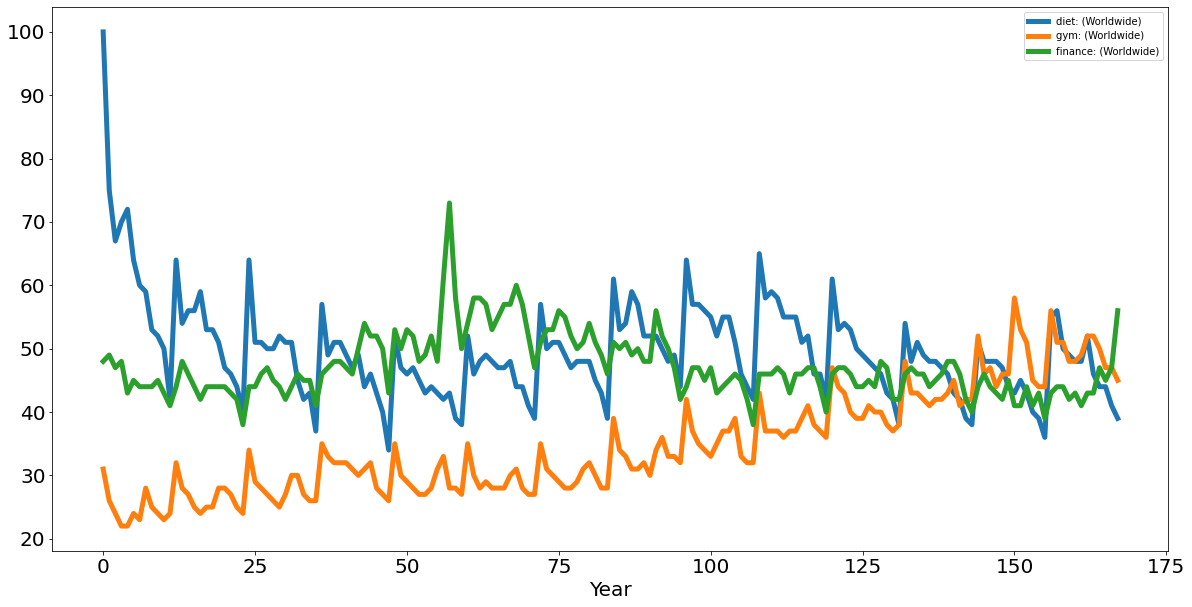

In [19]:
#Plotting time series
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\aditi maurya\Desktop\data\datacamp_facebook_live_ny_resolution\data\multiTimeline.csv",skiprows=1)
df.head()
#to get information of the dataset
df.info()

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [20]:
df.corr()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
diet: (Worldwide),1.000000,-0.100764,-0.034639
gym: (Worldwide),-0.100764,1.000000,-0.284279
finance: (Worldwide),-0.034639,-0.284279,1.000000


#Here diet and gym are negatively correlated. We have a seasional and trend session.
From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.
The actual correlation coefficient is actually capturing both.


In [52]:
import pandas as pd
#importing packages from python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#using this to view plots in jupyter notebook
sns.set() 
df = pd.read_csv(r"C:\Users\aditi maurya\Desktop\data\datacamp_facebook_live_ny_resolution\data\multiTimeline.csv",skiprows=1)
df.head()
#to get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [53]:
#reassigning the column names for better use
df.columns=['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


As we can see that month has been assigned as object datatype, we will re define it as DateTime datatype to make it the index of dataframe. ( Also, as an object datatype it will be generic to alpha numeric datas or string type, but for time series data we will be using .to_datetime() to convert month column in your dataframe to a datetime)

In [54]:
#disclaimer = include inplace argument while setting index of the df so that actual index will be altered
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)


In [55]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


We will be using built-in pandas visualisaion method .plot() to plot the dataset.

Text(0.5, 0, 'YEAR')

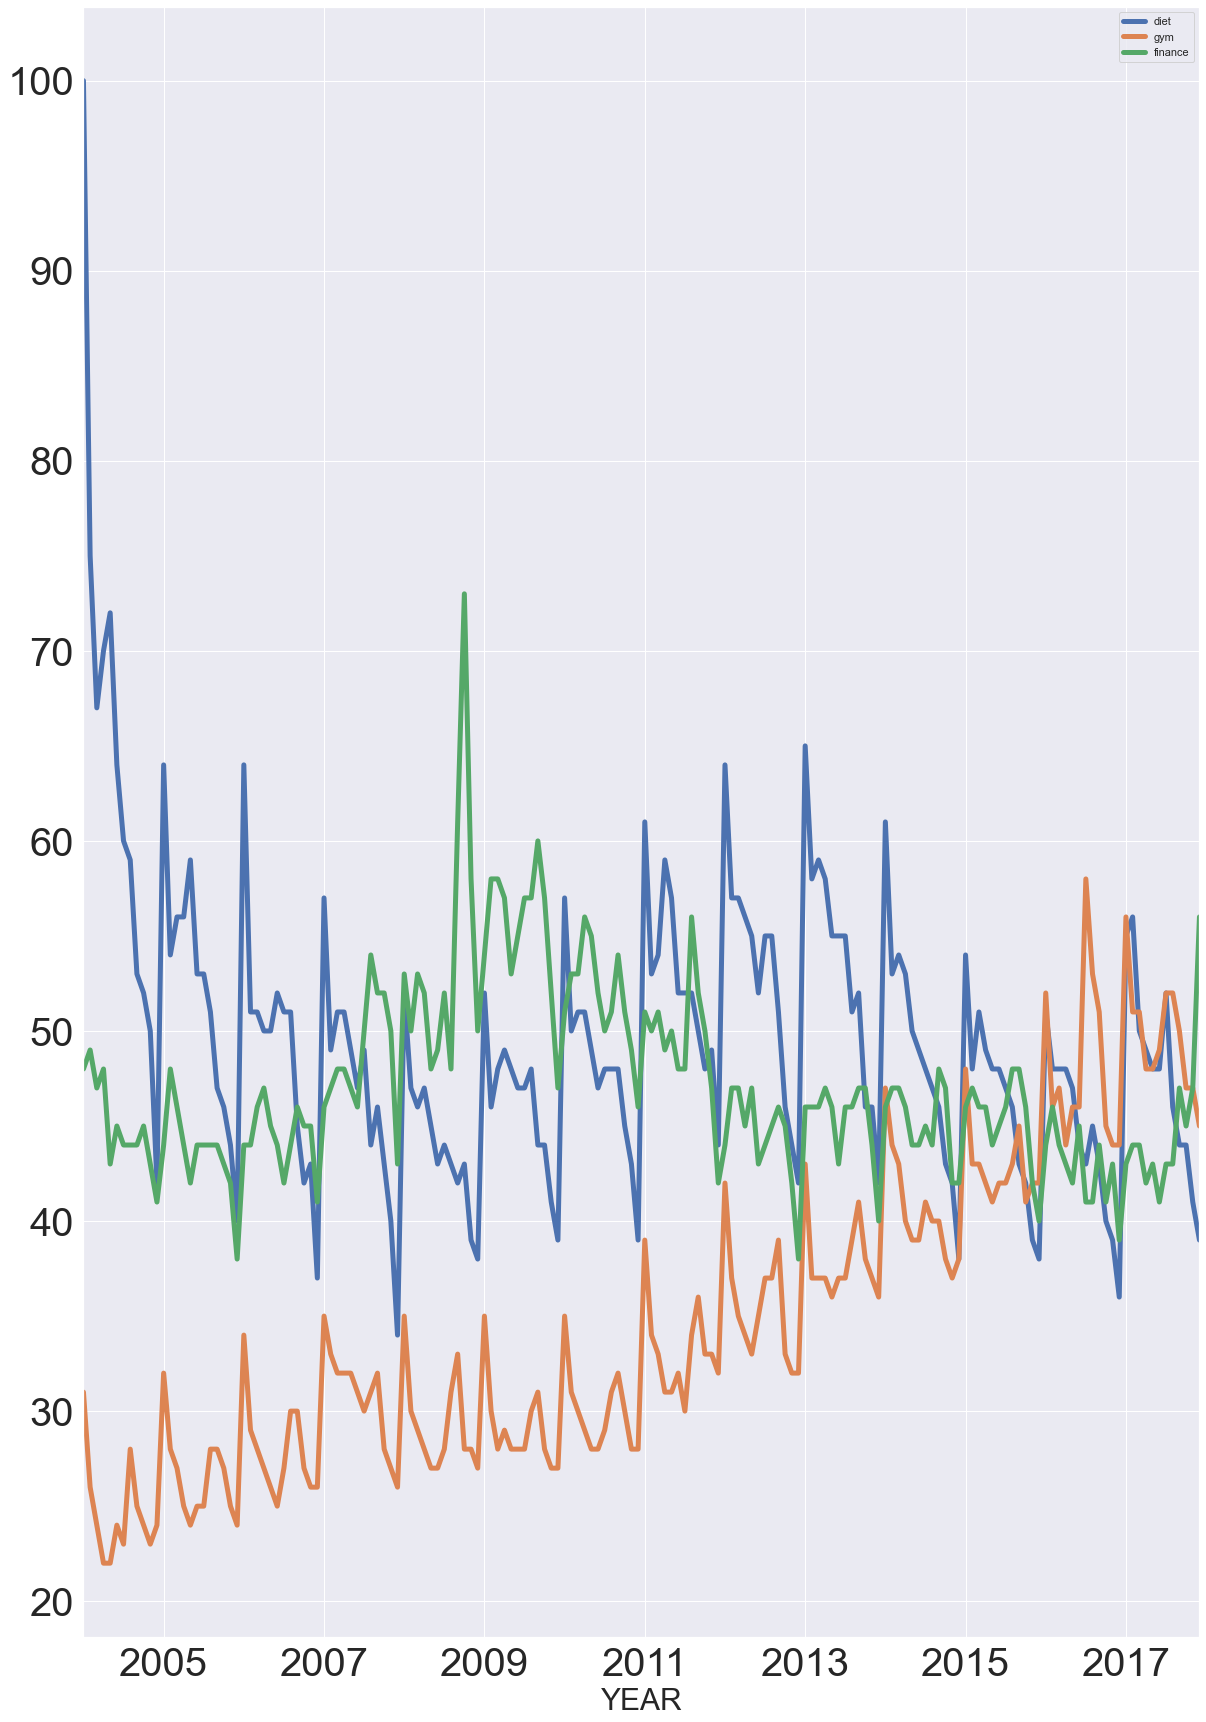

In [56]:
import matplotlib.pyplot as plt
df.plot(figsize=(20,30),linewidth=5,fontsize=40)
plt.xlabel('YEAR',fontsize=30)


Text(0, 0.5, 'finance')

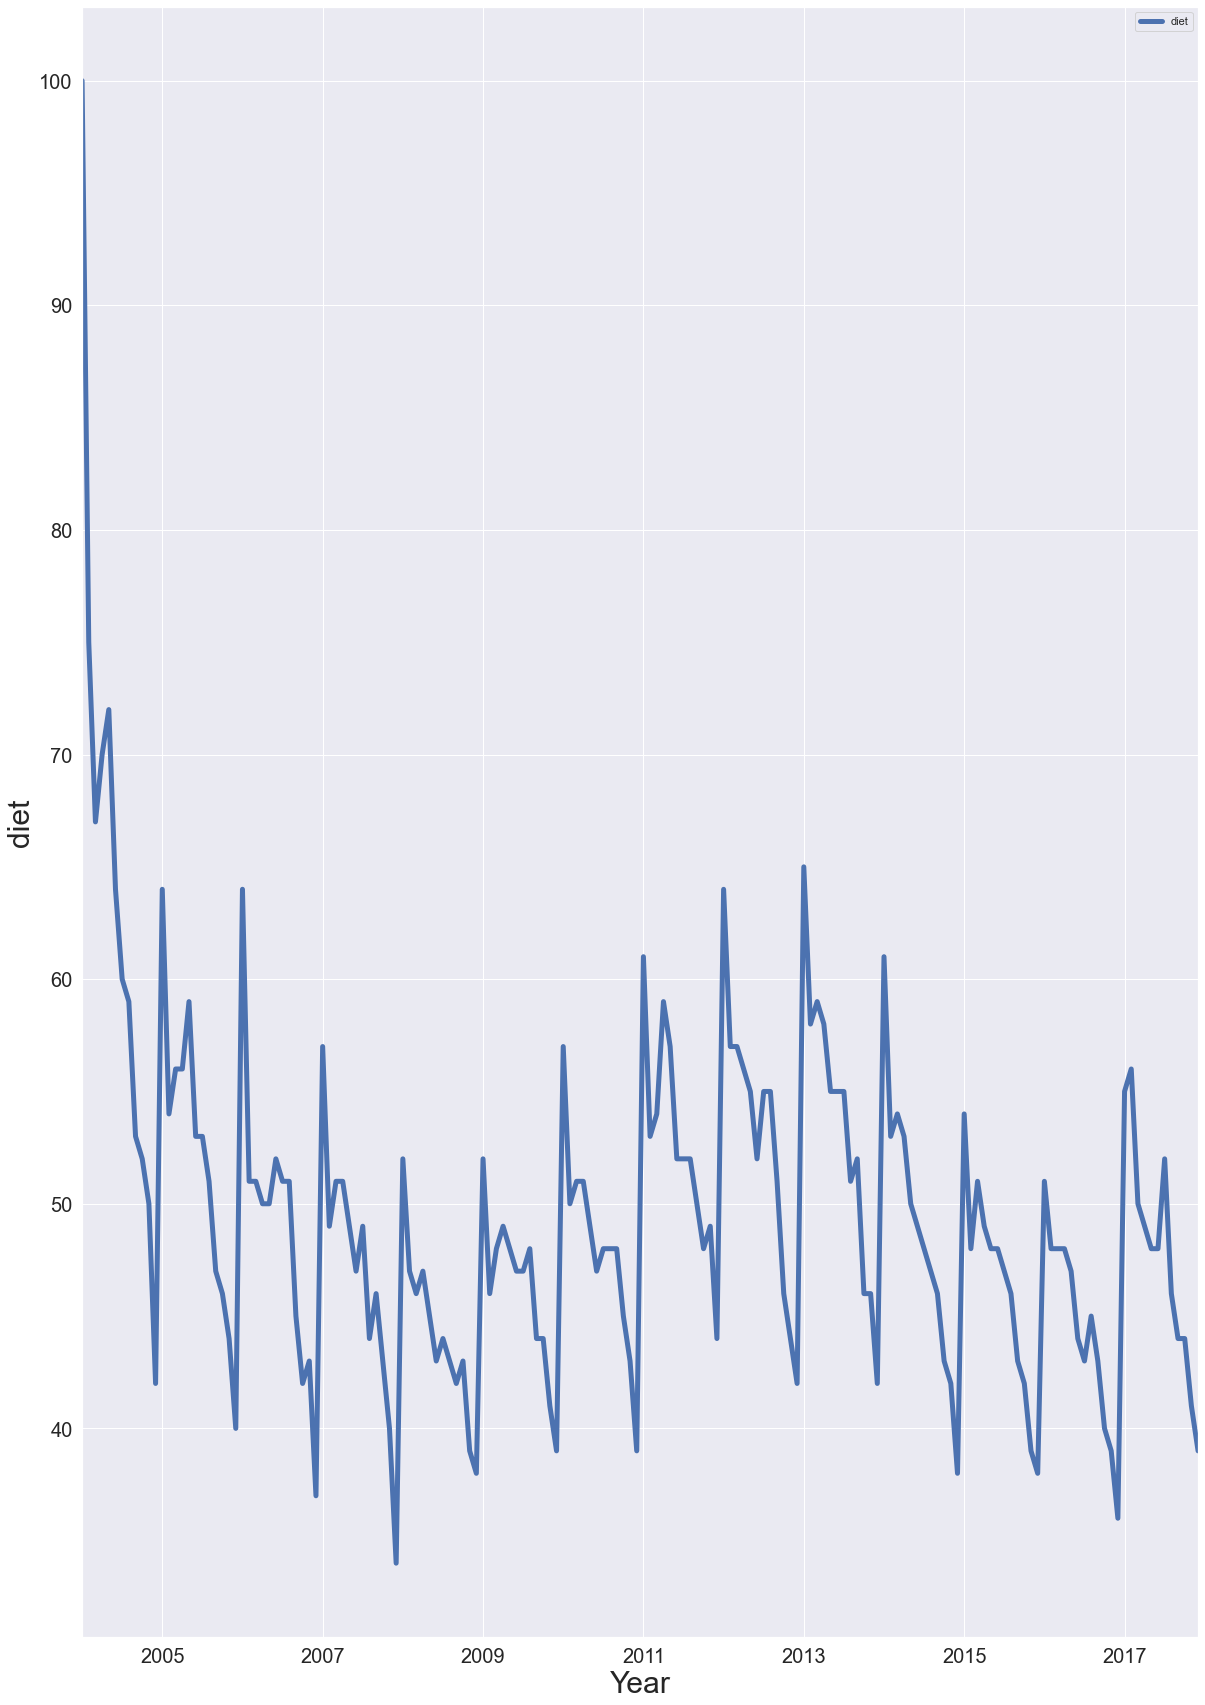

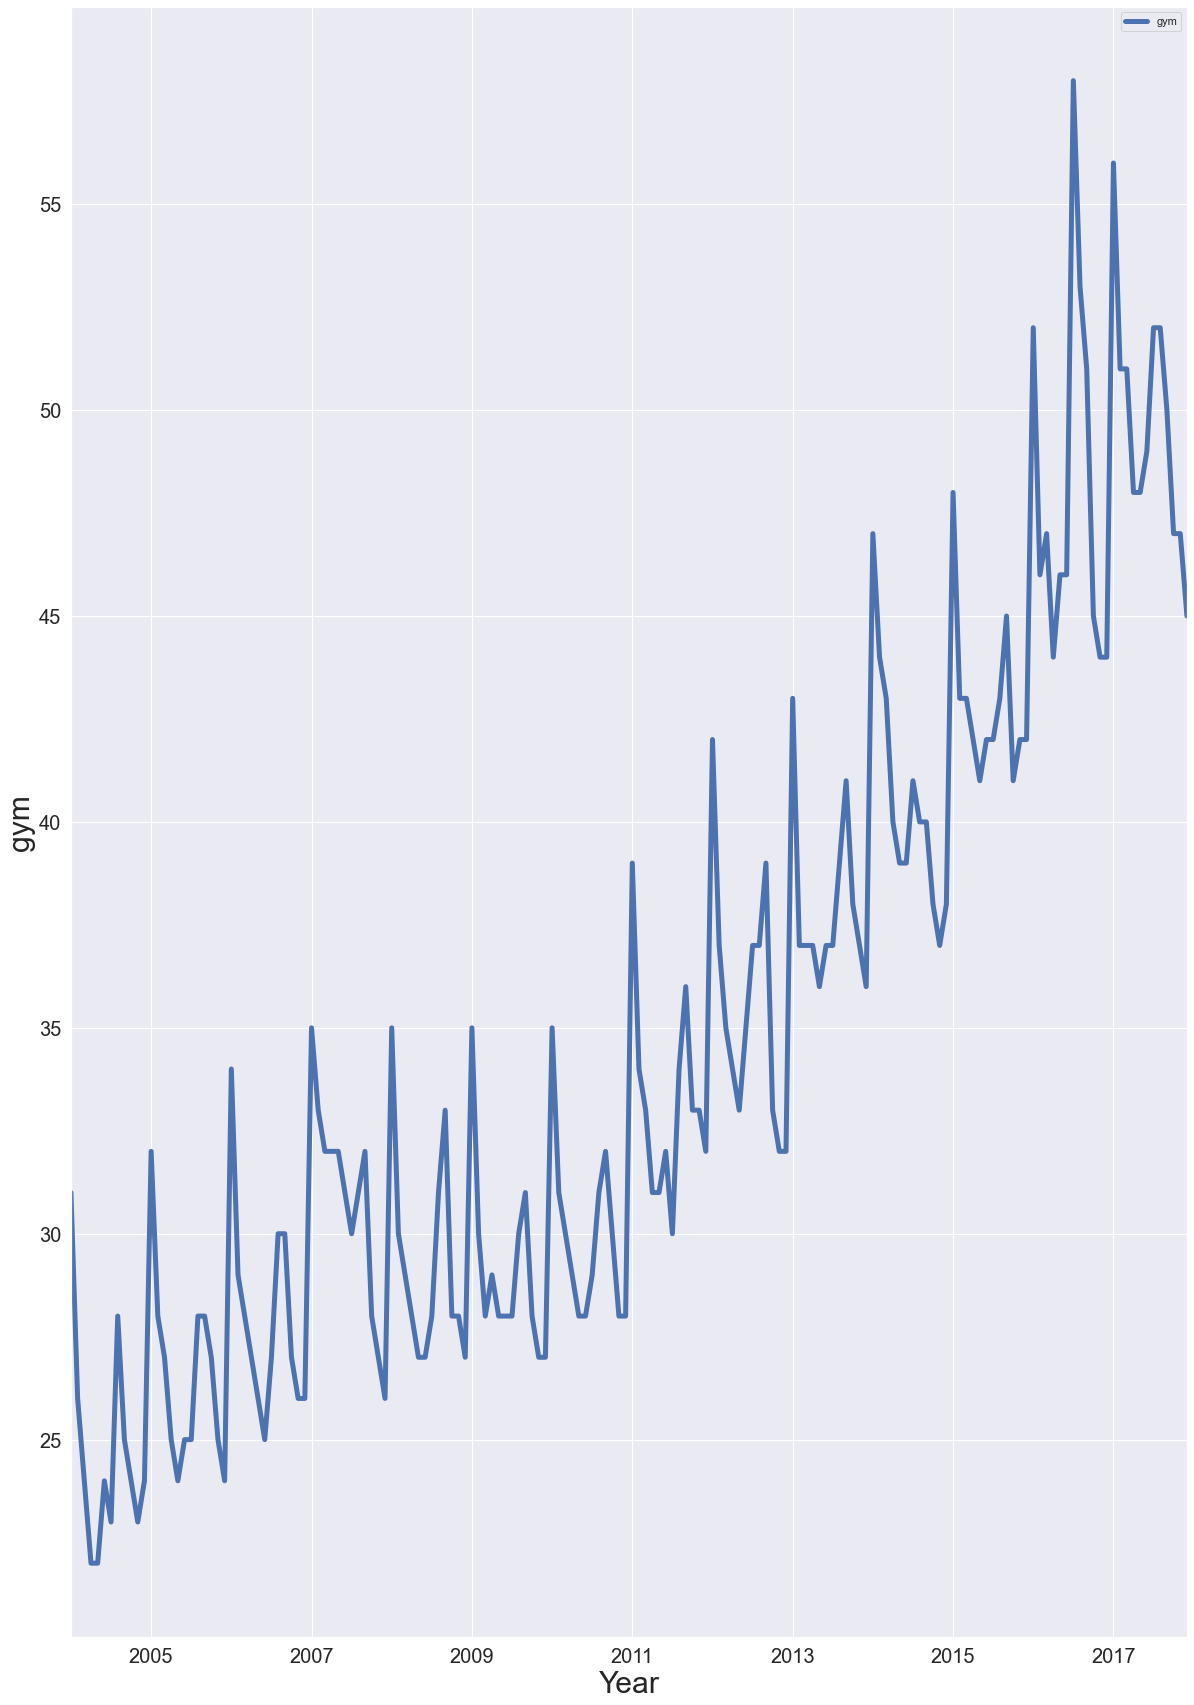

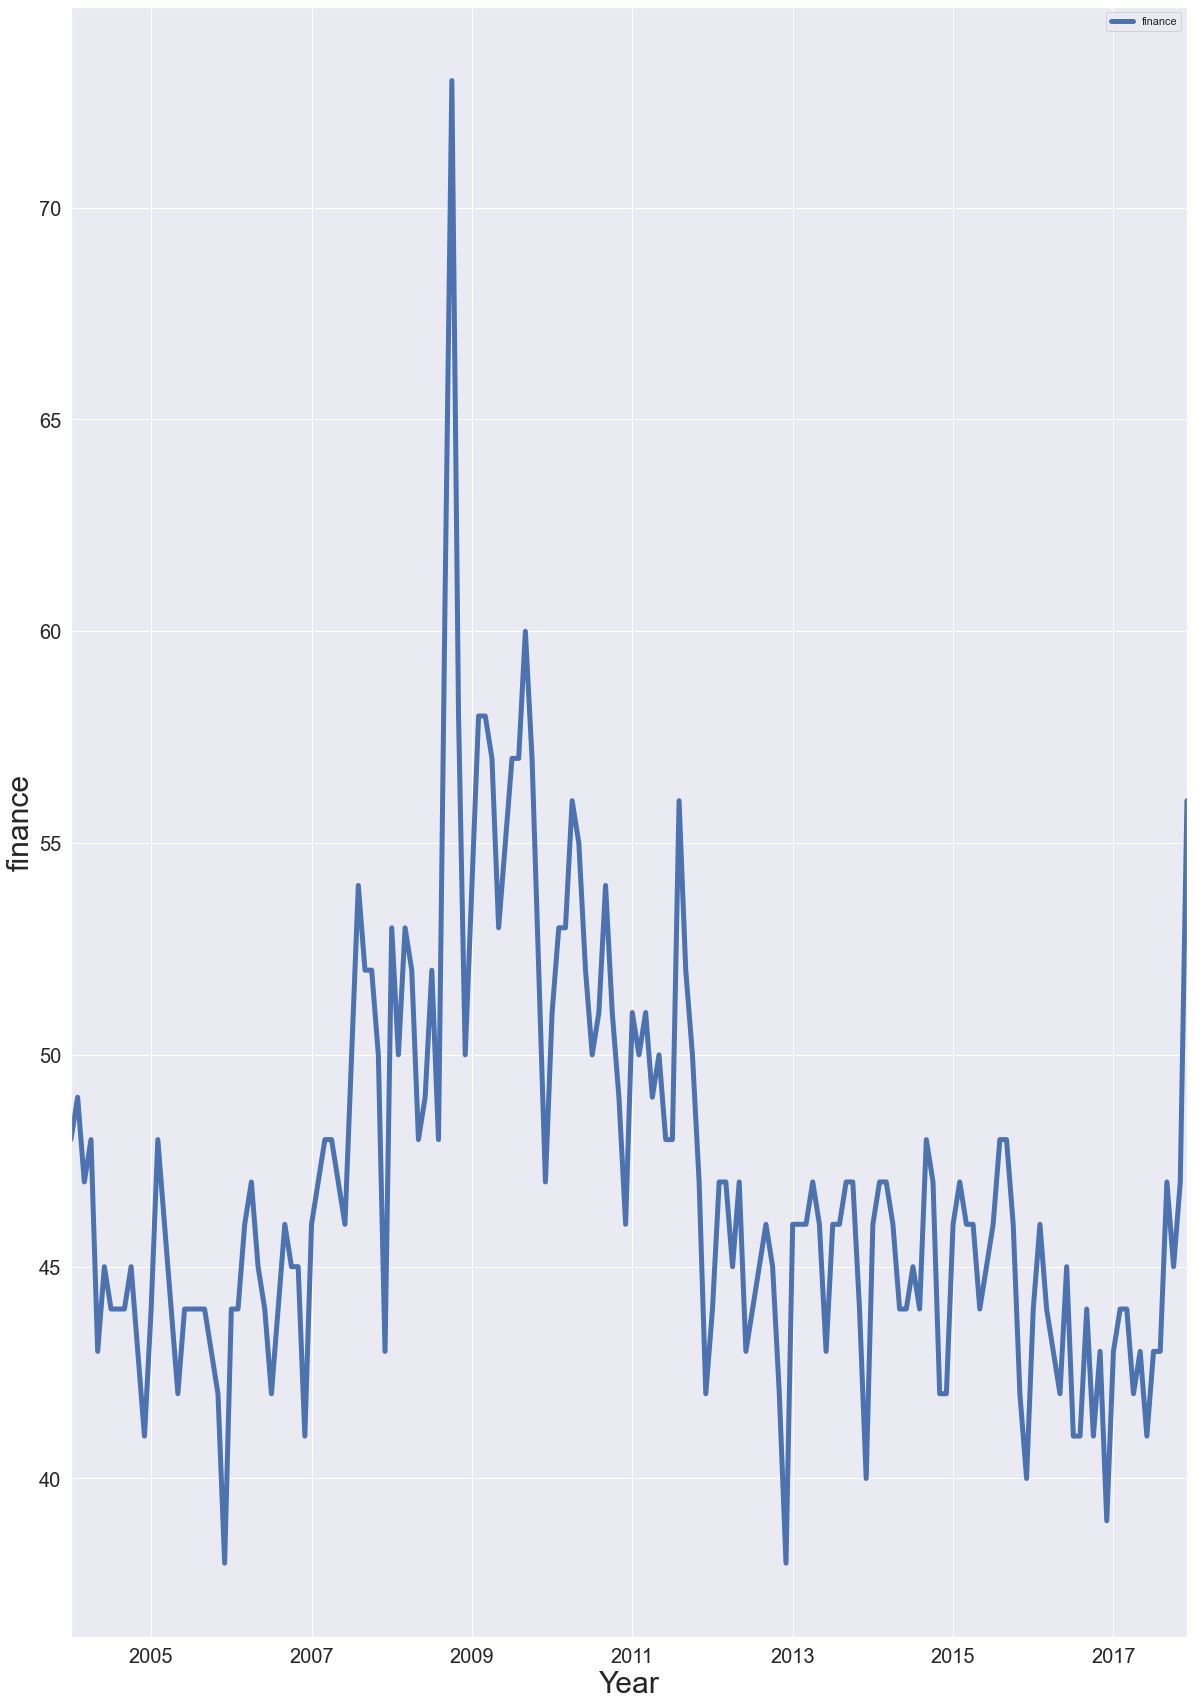

In [57]:
df[['diet']].plot(figsize=(20,30),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=30)
plt.ylabel('diet',fontsize=30)
df[['gym']].plot(figsize=(20,30),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=30)
plt.ylabel('gym',fontsize=30)
df[['finance']].plot(figsize=(20,30),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=30)
plt.ylabel('finance',fontsize=30)

TRENDS AND SEASONALITY IN TIME SERIES DATA 
Identifying trends in Time series here we are refering to the rolling average method, according to which for each time point , we take the average of the points on the either side of it. NOTE: number of points is specified by a window size, which you need to choose. Now below we are taking the rolling average of 'diet' using the built-in pandas method.

Text(0.5, 0, 'year')

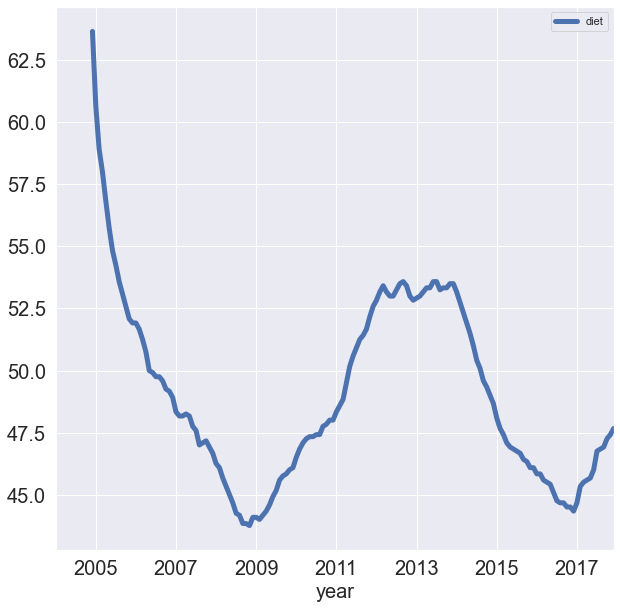

In [58]:
diet=df[['diet']]
diet.rolling(12).mean().plot(figsize=(10,10),linewidth=5,fontsize=20)
plt.xlabel('year',fontsize=20)

Text(0.5, 0, 'Year')

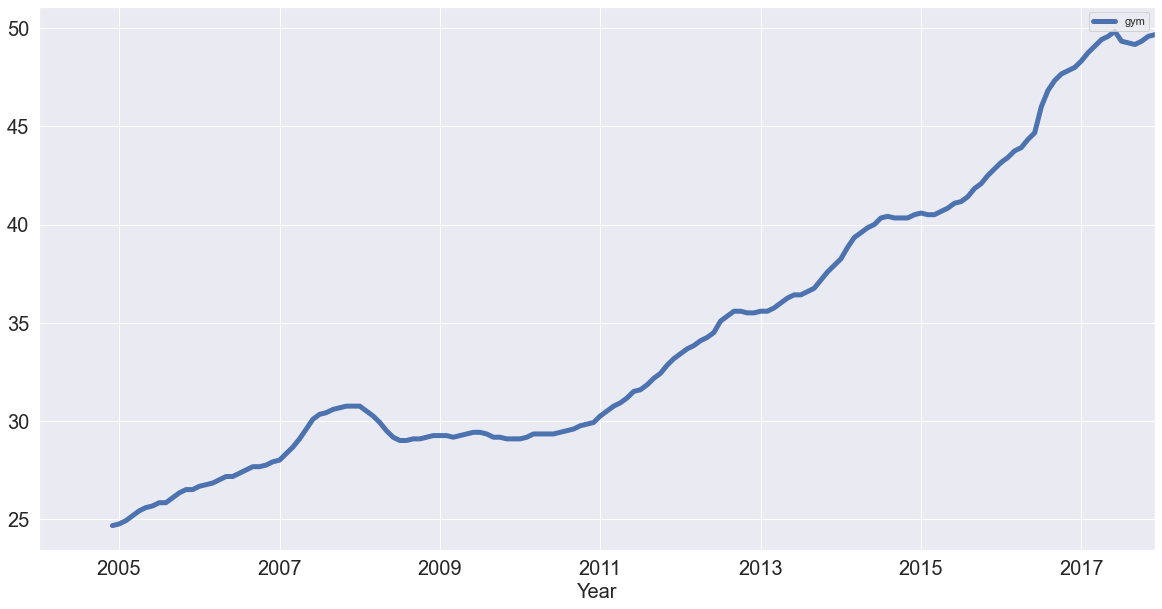

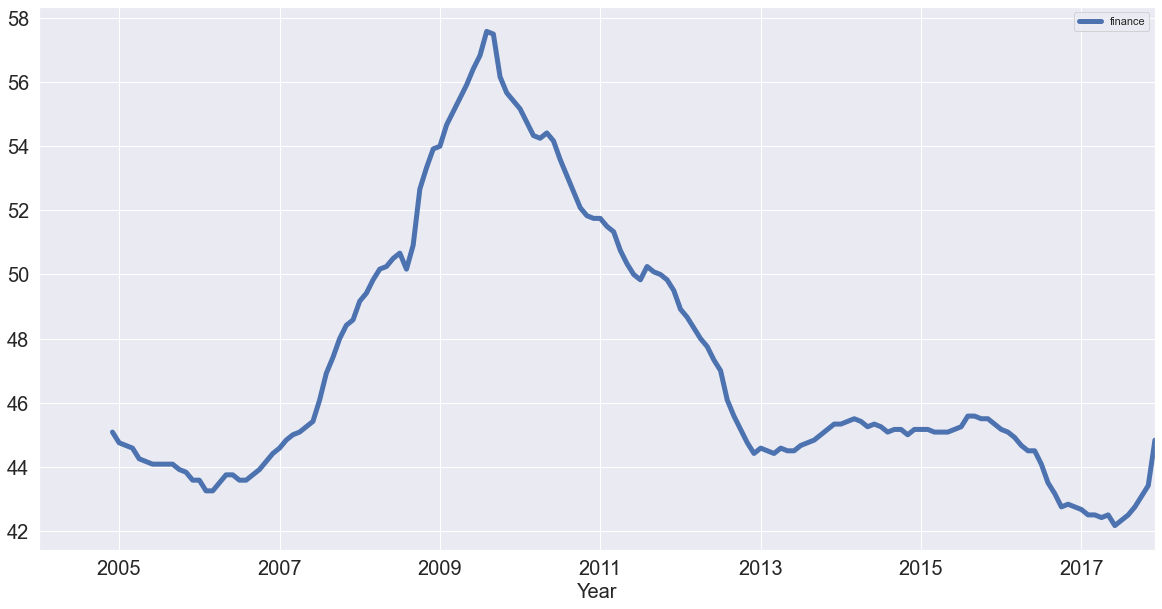

In [59]:
# Now similar to the diet we can plot graphs of gym and finance.
gym=df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
finance=df[['finance']]
finance.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

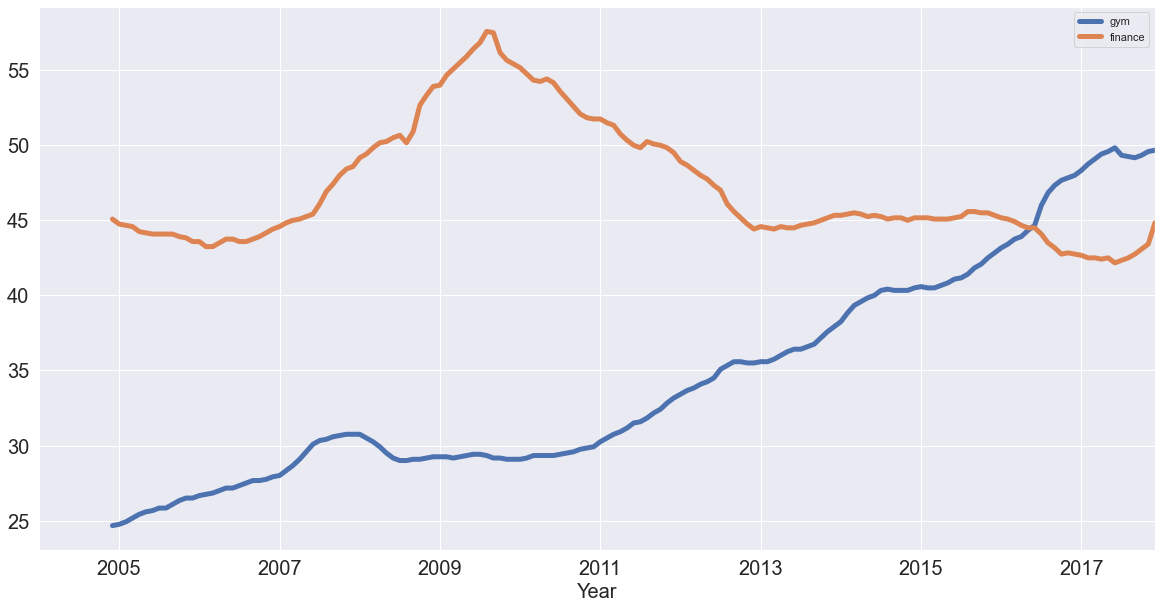

In [60]:
df_d=pd.concat([df[['gym']].rolling(12).mean(), df[['finance']].rolling(12).mean()], axis=1)
df_d.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20);

Now we can see that finance potentially has some form of seasonality, whereas gym is actually increasing and hence we can compare them.

Text(0, 0.5, 'diet')

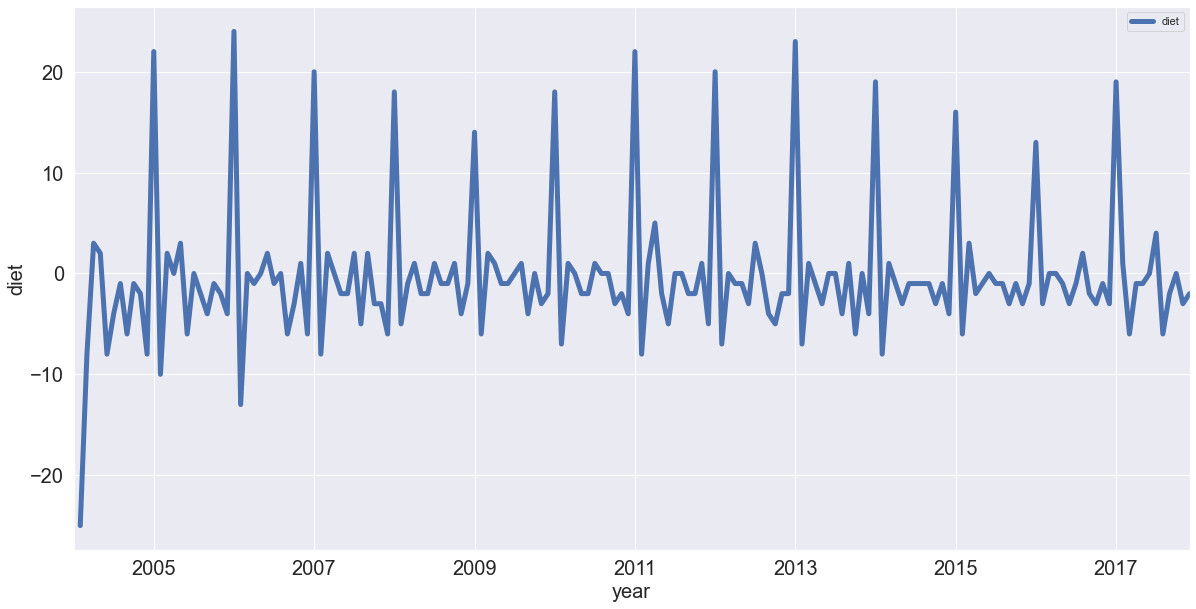

In [61]:
#Seasonal patterns in time series data: 'Differencing': It is a trend where we look at the difference between successive data points and hence we call it "first-order differencing", because we are only looking at the difference between one data point and the one before it. #First-order differencing: let us see the first-order differencing for diet, finance and gym one by one

diet.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('diet',fontsize=20)

Text(0, 0.5, 'finance')

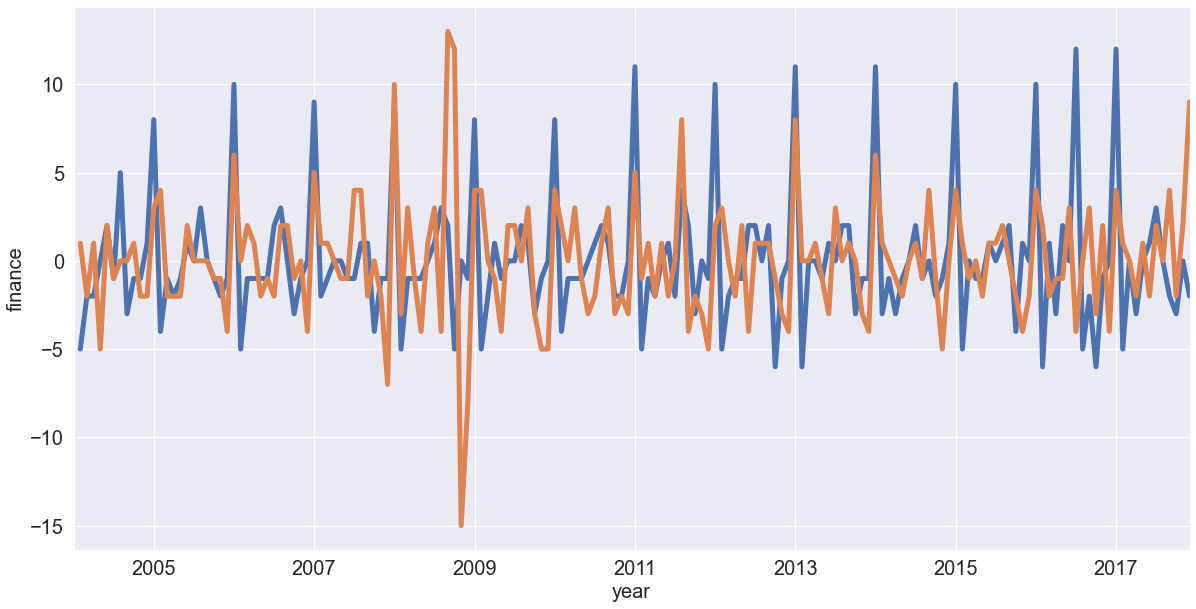

In [62]:
df.gym.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('gym',fontsize=20)
#for fianance:
df.finance.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('finance',fontsize=20)

Differencing turn our time series into stationary time series. Stationary time series statistical properties do not change over time. we can now analyse our periodicity in our time series by looking at its autocorrelation function. #PERIODICITY AND AUTOCORRELATION: A time series is periodic if it repeats itself at equal spaced intervals.

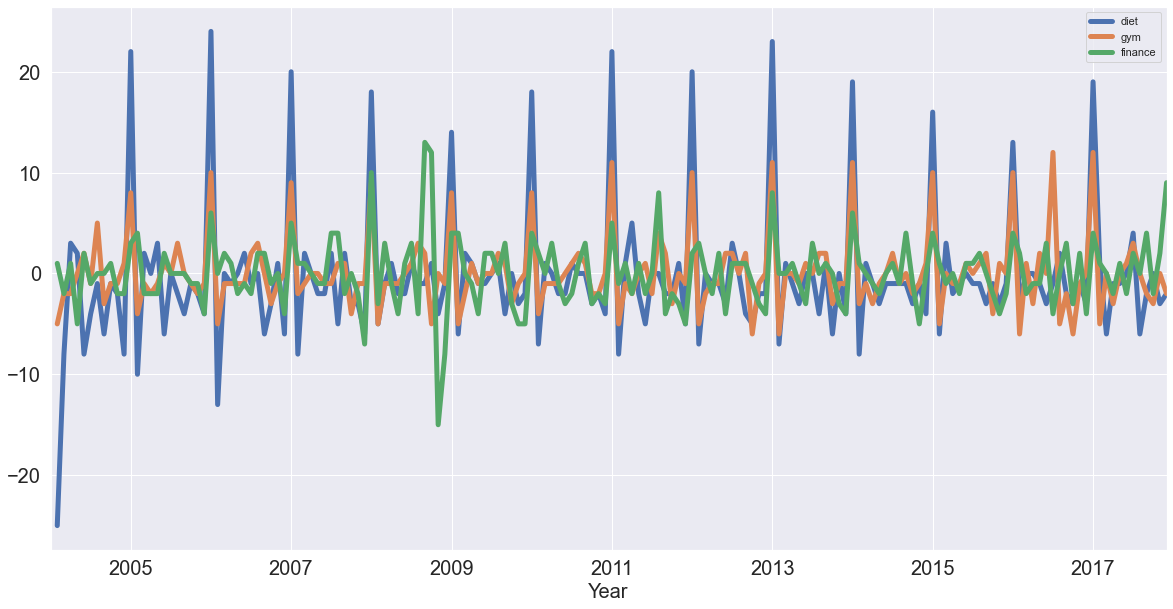

In [63]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

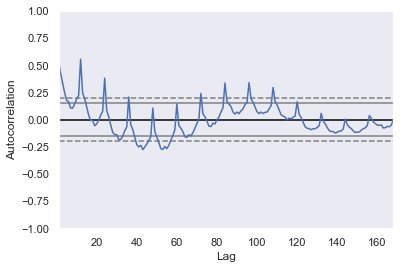

In [64]:
pd.plotting.autocorrelation_plot(diet);